In [107]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

### Load the trained data and extract layers and weights

In [4]:
autoencoder = load_model('autoencoder.hdf5', compile=False)
print(autoencoder.summary())

Model: "functional_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 379)]             0         
                                                                 
 dense (Dense)               (None, 160)               60800     
                                                                 
 dense_1 (Dense)             (None, 80)                12880     
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dense_3 (Dense)             (None, 80)                3280      
                                                                 
 dense_4 (Dense)             (None, 160)               12960     
                                                                 
 dense_5 (Dense)             (None, 379)              

In [35]:
# get the layers
lat_40_layer = autoencoder.layers[3]
dec_80_layer = autoencoder.layers[4]
dec_160_layer = autoencoder.layers[5]
# get the weights (weight stored at [0] and bias at [1])
w_40_80 = dec_80_layer.get_weights()[0]
w_80_160 = dec_160_layer.get_weights()[0]
w_160_379 = autoencoder.layers[6].get_weights()[0]
print(lat_40_layer.get_config()['name'])
print(dec_80_layer.get_config()['name'])
print(dec_160_layer.get_config()['name'])
print(w_40_80.shape)
print(w_80_160.shape)
print(w_160_379.shape)

dense_2
dense_3
dense_4
(40, 80)
(80, 160)
(160, 379)


### Plot the distribution of the weights

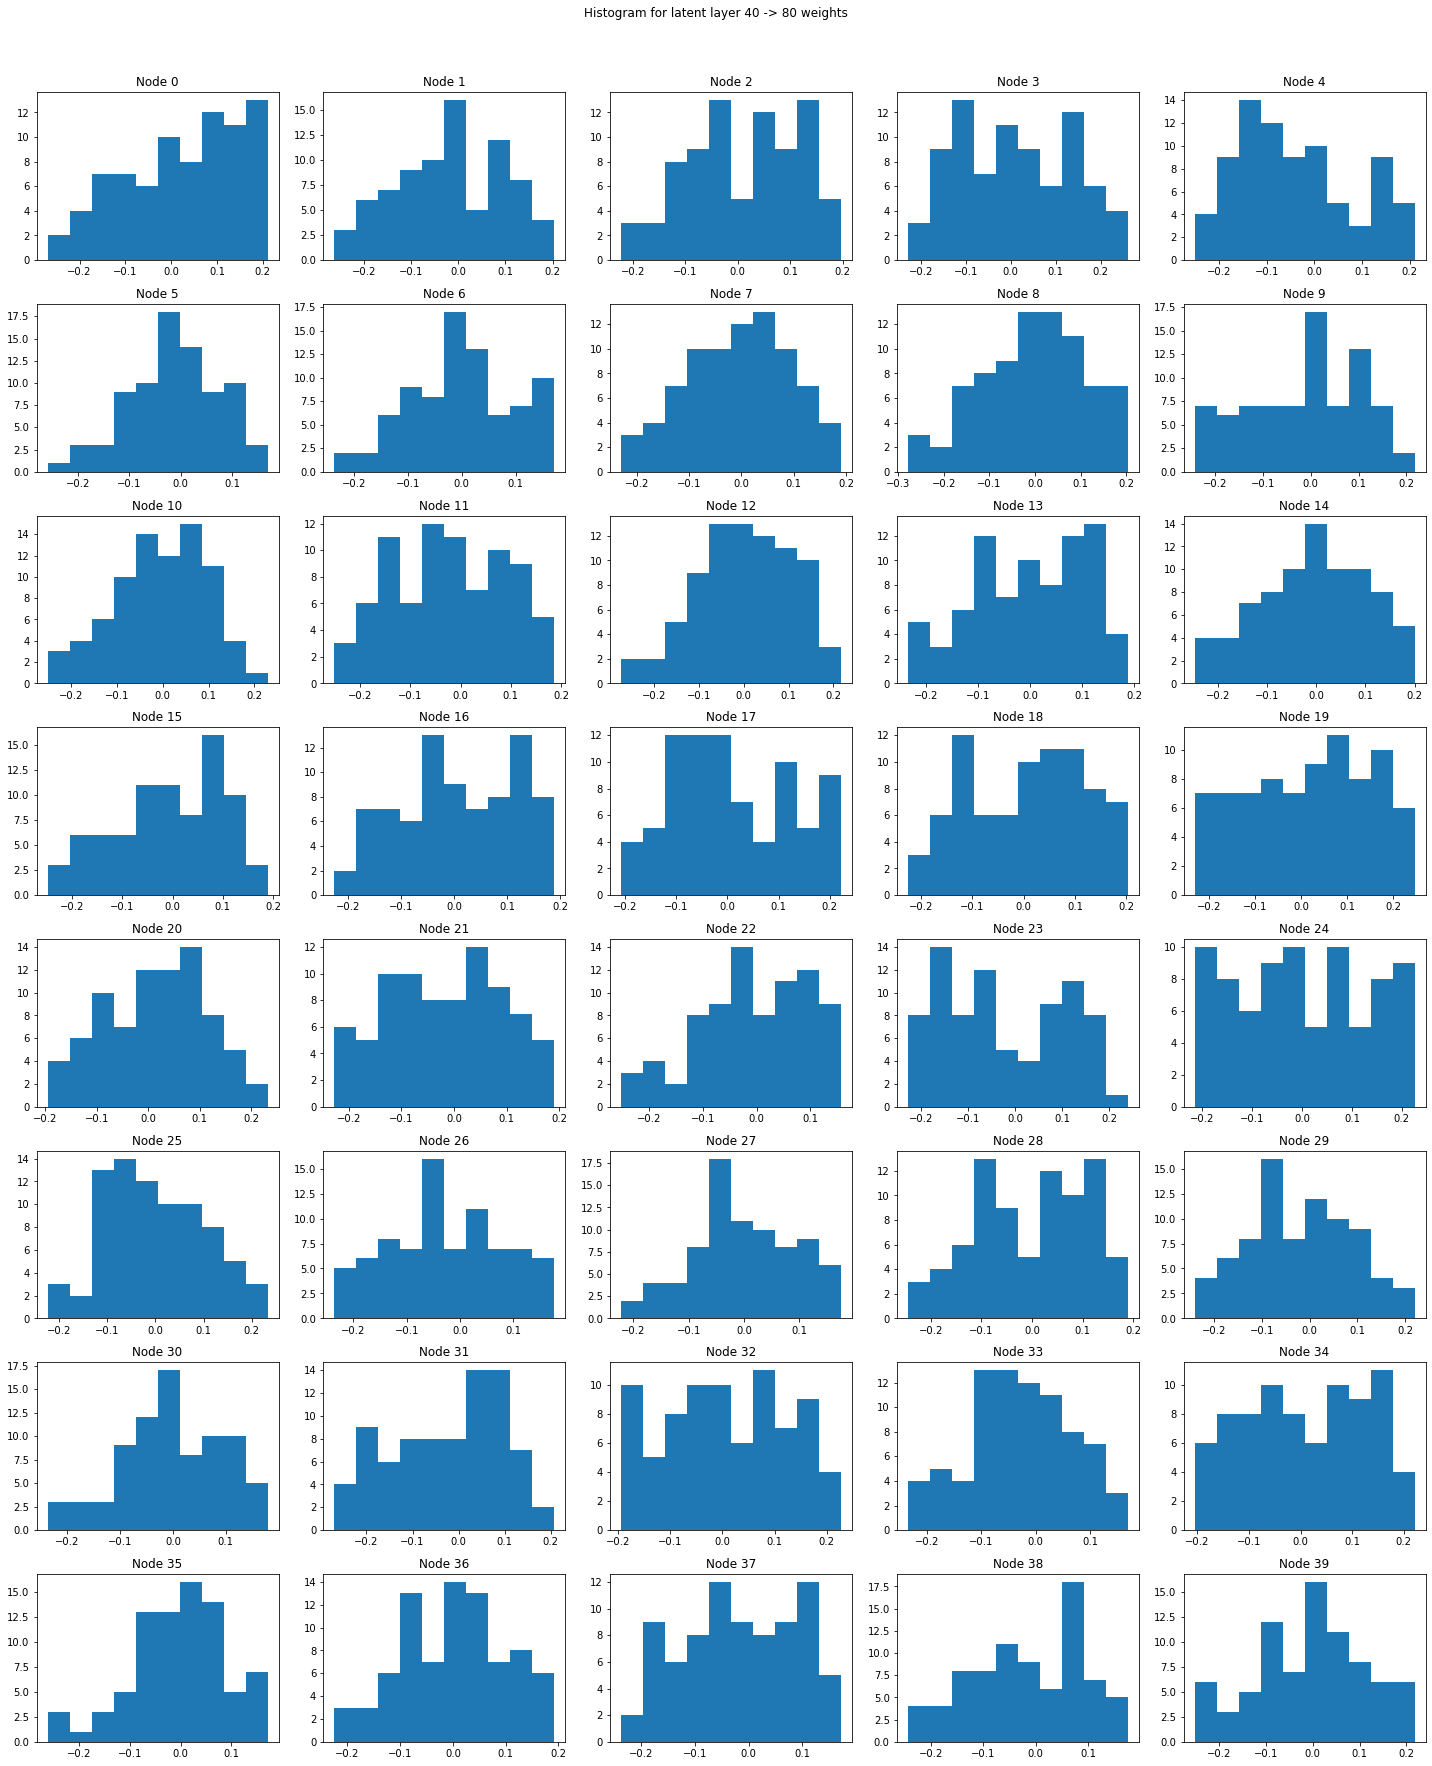

In [64]:
f, axarr = plt.subplots(8,5, figsize=(20, 24))
x = 0
y = 0
for i in range(w_40_80.shape[0]):
    weights = w_40_80[i]
    axarr[x][y].hist(weights)
    axarr[x][y].set_title(f'Node {i}')
    if x > 7:
        x = 0
    else:
        y += 1
    if y > 4:
        y = 0
        x += 1
plt.suptitle('Histogram for latent layer 40 -> 80 weights', y = 1.02)
plt.tight_layout()
plt.show()

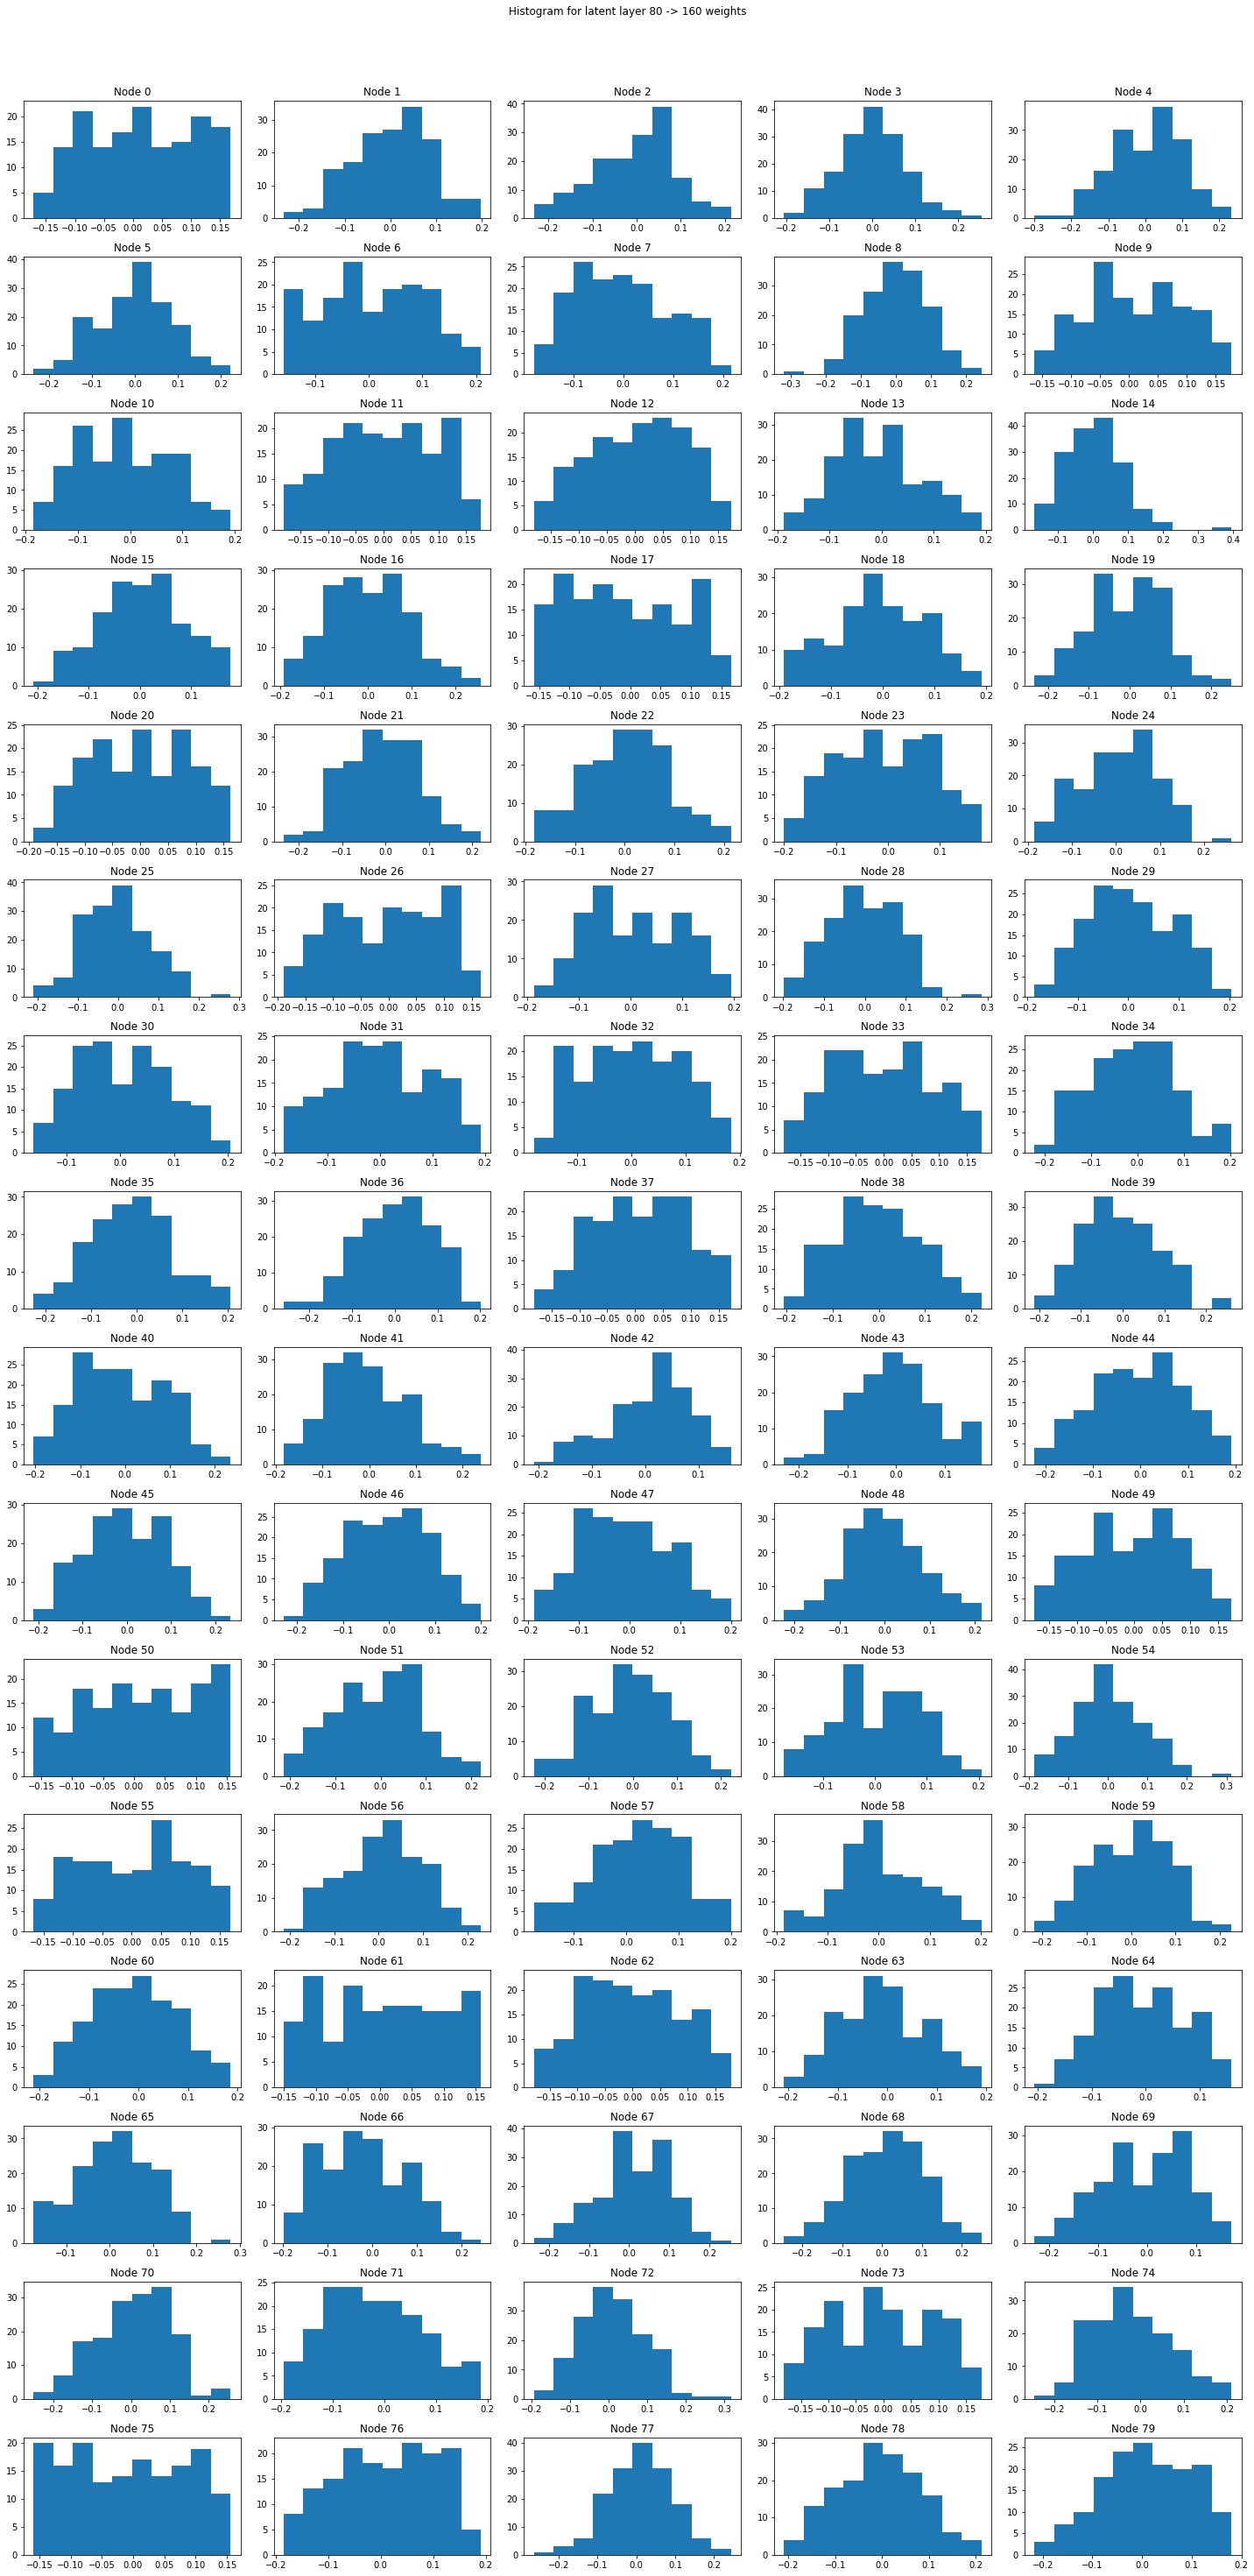

In [65]:
f, axarr = plt.subplots(16,5, figsize=(20, 40))
x = 0
y = 0
for i in range(w_80_160.shape[0]):
    weights = w_80_160[i]
    axarr[x][y].hist(weights)
    axarr[x][y].set_title(f'Node {i}')
    if x > 15:
        x = 0
    else:
        y += 1
    if y > 4:
        y = 0
        x += 1
plt.suptitle('Histogram for latent layer 80 -> 160 weights', y = 1.02)
plt.tight_layout()
plt.show()

### Rank and find the top 3 right nodes that were contributed more by the left layer

In [87]:
a = np.array([111, 22, 33, 444, 55, 66, 77, 88, 99, 100])
a


array([111,  22,  33, 444,  55,  66,  77,  88,  99, 100])

In [88]:
ind = np.argsort(a)
ind

array([1, 2, 4, 5, 6, 7, 8, 9, 0, 3], dtype=int64)

In [89]:
new = []
for i in ind:
    new.append(a[i])
new = np.array(new)
new

array([ 22,  33,  55,  66,  77,  88,  99, 100, 111, 444])

In [105]:
# 40 -> 80
'''
    For each node add 5 * 2 = 10 values to a sublist
    [top1 index, top1 weight, second index, second weight, third index, third weight, ......]
'''
top_5_40_80 = []
for w in w_40_80:
    ind = np.argsort(w) # sorted indices
    node_ls = []
    count_5 = -1
    while count_5 >= -5:
        i = ind[count_5]
        node_ls.append(int(i))
        node_ls.append(w[i])
        count_5 -= 1
    top_5_40_80.append(node_ls)
top_5_40_80 = np.array(top_5_40_80)
top_5_40_80 = pd.DataFrame(top_5_40_80, columns = ['First node index','Value',
                                                   'Second node index','Value', 
                                                   'Third node index','Value', 
                                                   'Fourth node index','Value', 
                                                   'Fifth node index','Value'])
top_5_40_80

First node index     Value  Second node index     Value  Third node index  \
0               15.0  0.210440               63.0  0.201415               9.0   
1               66.0  0.203466               73.0  0.174324               2.0   
2                6.0  0.197214                9.0  0.192457               7.0   
3                2.0  0.260629               43.0  0.249361              55.0   
4               57.0  0.210078               77.0  0.193799              62.0   
5               57.0  0.168848                8.0  0.156823              53.0   
6               24.0  0.171567               39.0  0.165024              15.0   
7               50.0  0.190694               36.0  0.178401              14.0   
8               77.0  0.203176               73.0  0.181816              71.0   
9               33.0  0.217667               23.0  0.201523               5.0   
10              34.0  0.228656               47.0  0.178304              79.0   
11              12.0  0.186541               70.0  0.175429              33.0   
12              73.0  0.216871               68.0  0.185681              70.0   
13              56.0  0.187845               50.0  0.170189              20.0   
14              23.0  0.199808               20.0  0.192330              67.0   
15              48.0  0.189032               12.0  0.157014              69.0   
16              28.0  0.189093               21.0  0.175695              17.0   
17               0.0  0.222108               22.0  0.219750              37.0   
18              12.0  0.203301               66.0  0.194809              18.0   
19              60.0  0.245925               65.0  0.221205              20.0   
20              59.0  0.232288               19.0  0.190350              56.0   
21              51.0  0.190900               60.0  0.173745              68.0   
22              51.0  0.157162                9.0  0.152981              30.0   
23              77.0  0.239722               68.0  0.183063              78.0   
24              44.0  0.225807               34.0  0.223638              55.0   
25              48.0  0.232623               40.0  0.207234              75.0   
26              11.0  0.176597               22.0  0.168369              72.0   
27              29.0  0.175336               68.0  0.163920              77.0   
28              40.0  0.189621               23.0  0.183176              51.0   
29              32.0  0.219936               79.0  0.201634              41.0   
30              43.0  0.179176               44.0  0.147093              62.0   
31               0.0  0.207492               34.0  0.175138              66.0   
32              59.0  0.227198               34.0  0.211066              51.0   
33               0.0  0.168450               41.0  0.151922              67.0   
34              55.0  0.221147               66.0  0.195396              18.0   
35               2.0  0.171759               16.0  0.168275              15.0   
36              15.0  0.192284                3.0  0.177463              39.0   
37              39.0  0.171622               75.0  0.171252              31.0   
38              20.0  0.176152               69.0  0.147684              23.0   
39              61.0  0.217435                7.0  0.197557              50.0   

       Value  Fourth node index     Value  Fifth node index     Value  
0   0.199718               43.0  0.186906              33.0  0.186646  
1   0.169766               34.0  0.165582              53.0  0.154478  
2   0.191942               25.0  0.184108              29.0  0.156380  
3   0.218716               31.0  0.214279               3.0  0.205547  
4   0.185865               44.0  0.171832              31.0  0.168124  
5   0.138841               42.0  0.122213              26.0  0.104076  
6   0.164896               70.0  0.162367              13.0  0.151344  
7   0.175912               71.0  0.155686              24.0  0.144831  
8   0.166508                2.0  0

In [106]:
# 80 -> 160
'''
    For each node add 5 * 2 = 10 values to a sublist
    [top1 index, top1 weight, second index, second weight, third index, third weight, ......]
'''
top_5_80_160 = []
for w in w_80_160:
    ind = np.argsort(w) # sorted indices
    node_ls = []
    count_5 = -1
    while count_5 >= -5:
        i = ind[count_5]
        node_ls.append(i)
        node_ls.append(w[i])
        count_5 -= 1
    top_5_80_160.append(node_ls)
top_5_80_160 = np.array(top_5_80_160)
top_5_80_160 = pd.DataFrame(top_5_80_160, columns = ['First node index','Value',
                                                   'Second node index','Value', 
                                                   'Third node index','Value', 
                                                   'Fourth node index','Value', 
                                                   'Fifth node index','Value'])
top_5_80_160

First node index     Value  Second node index     Value  Third node index  \
0                2.0  0.168090               80.0  0.155533              69.0   
1               91.0  0.198647               34.0  0.196528             143.0   
2              137.0  0.214119              126.0  0.205858             120.0   
3               10.0  0.253921              114.0  0.205013              51.0   
4              128.0  0.233435                6.0  0.195613             129.0   
..               ...       ...                ...       ...               ...   
75              35.0  0.155957              147.0  0.149414              66.0   
76               5.0  0.191110               91.0  0.174708             107.0   
77              30.0  0.244068               69.0  0.215494              50.0   
78              87.0  0.212433              156.0  0.200871              69.0   
79              27.0  0.180400              112.0  0.174417             107.0   

       Value  Fourth node index     Value  Fifth node index     Value  
0   0.152391              156.0  0.151811              53.0  0.151297  
1   0.186937                7.0  0.173944             107.0  0.169519  
2   0.199787                9.0  0.172168             143.0  0.149043  
3   0.192589              141.0  0.169644             136.0  0.152934  
4   0.188927              137.0  0.184983              99.0  0.150736  
..       ...                ...       ...               ...       ...  
75  0.144462              149.0  0.143781             100.0  0.140972  
76  0.158370              139.0  0.157238              17.0  0.154536  
77  0.177954              146.0  0.177338             110.0  0.166072  
78  0.185032               37.0  0.182545              55.0  0.158315  
79  0.168658               26.0  0.159908             135.0  0.148904  

[80 rows x 10 columns]

### Draw the paths

In [237]:
points = [[], [], []]
x = 1
y = 320
for n in range(40):
    points[0].append((x, y))
    y -= 16
    
x = 5
y = 320
for n in range(80):
    points[1].append((x, y))
    y -= 8
    
x = 9
y = 320
for n in range(160):
    points[2].append((x, y))
    y -= 4

In [238]:
top_1_connections = []
i = 0
for index in top_5_40_80['First node index']:
    index = int(index)
    point1 = points[0][i]
    point2 = points[1][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_1_connections.append((x, y))
    i += 1
i = 0
for index in top_5_80_160['First node index']:
    index = int(index)
    point1 = points[1][i]
    point2 = points[2][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_1_connections.append((x, y))
    i += 1

top_2_connections = []
i = 0
for index in top_5_40_80['Second node index']:
    index = int(index)
    point1 = points[0][i]
    point2 = points[1][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_2_connections.append((x, y))
    i += 1
i = 0
for index in top_5_80_160['Second node index']:
    index = int(index)
    point1 = points[1][i]
    point2 = points[2][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_2_connections.append((x, y))
    i += 1

top_3_connections = []
i = 0
for index in top_5_40_80['Third node index']:
    index = int(index)
    point1 = points[0][i]
    point2 = points[1][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_3_connections.append((x, y))
    i += 1
i = 0
for index in top_5_80_160['Third node index']:
    index = int(index)
    point1 = points[1][i]
    point2 = points[2][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_3_connections.append((x, y))
    i += 1
    
top_4_connections = []
i = 0
for index in top_5_40_80['Fourth node index']:
    index = int(index)
    point1 = points[0][i]
    point2 = points[1][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_4_connections.append((x, y))
    i += 1
i = 0
for index in top_5_80_160['Fourth node index']:
    index = int(index)
    point1 = points[1][i]
    point2 = points[2][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_4_connections.append((x, y))
    i += 1
    
top_5_connections = []
i = 0
for index in top_5_40_80['Fifth node index']:
    index = int(index)
    point1 = points[0][i]
    point2 = points[1][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_5_connections.append((x, y))
    i += 1
i = 0
for index in top_5_80_160['Fifth node index']:
    index = int(index)
    point1 = points[1][i]
    point2 = points[2][index]
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    top_5_connections.append((x, y))
    i += 1

all_connections = {1:top_1_connections, 
                   2:top_2_connections, 
                   3:top_3_connections, 
                   4:top_4_connections,
                   5:top_5_connections}

In [255]:
def plot_one_path(level = 1, accum = False, v_ls=[]):
    fig = plt.figure(figsize=[24, 20])
    for n in points:
        for m in n:
            plt.plot(m[0], m[1], marker = '.', color = 'black')
            
    if len(v_ls) == 0: # plot the lines for all vertices
        if not accum:
            for l in all_connections[level][:40]:
                plt.plot(l[0], l[1], color='r')

            for l in all_connections[level][40:]:
                plt.plot(l[0], l[1], color='b')
            plt.title(f'Top{level} Contribution')
        else:
            color = ['r', 'b', 'g', 'c', 'm']
            for i in range(level):
                c = color[i]
                lev = i+1
                for l in all_connections[lev][:40]:
                    plt.plot(l[0], l[1], color=c)
                for l in all_connections[lev][40:]:
                    plt.plot(l[0], l[1], color=c)
    else:
        print(f"Plot the pathways starting from selected {v_ls} vertices.")
        
        if not accum:
            for single_v in v_ls:
                l_40_80 = all_connections[level][single_v]
                plt.plot(l_40_80[0], l_40_80[1], color = 'r')

                for l in all_connections[level][40:]:
                    if l[0][0] == l_40_80[0][1] and l[1][0] == l_40_80[1][1]:
                        plt.plot(l[0], l[1], color='b')
            plt.title(f'Top{level} Contribution for {single_v}th Vertex in the Latent Layer')
        else:
            color = ['r', 'b', 'g', 'c', 'm']
            for single_v in v_ls:
                for i in range(level):
                    c = color[i]
                    lev = i+1
                    l_40_80 = all_connections[lev][single_v]
                    plt.plot(l_40_80[0], l_40_80[1], color=c)

                    for l in all_connections[lev][40:]:
                        if l[0][0] == l_40_80[0][1] and l[1][0] == l_40_80[1][1]:
                            plt.plot(l[0], l[1], color=c)
            plt.title(f'Top{level} Contribution for {single_v}th Vertex in the Latent Layer')
                
    plt.xlim([0, 10])
    plt.show()
    return

Plot the pathways starting from selected [2, 5, 10, 15, 20] vertices.


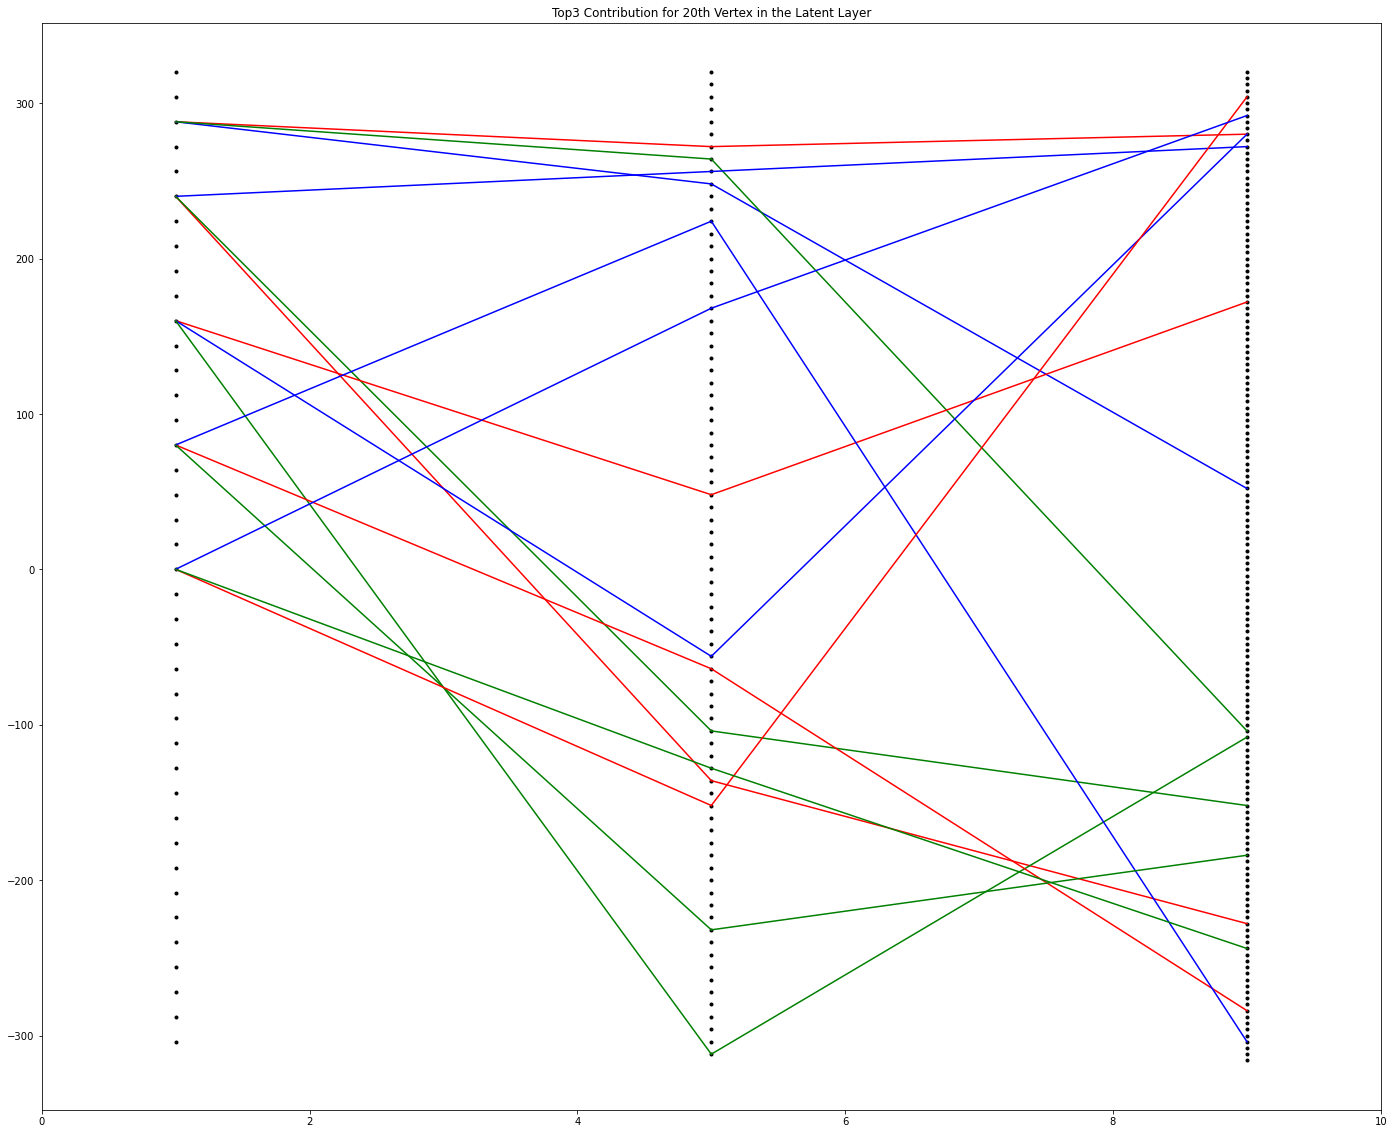

In [261]:
plot_one_path(3, True, [2, 5, 10, 15, 20])